In [1]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))

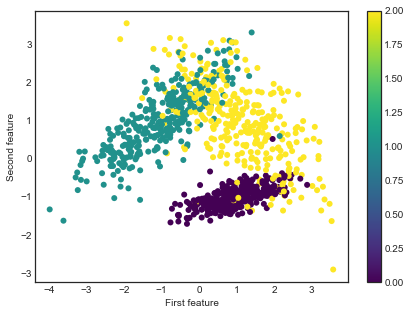

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Show plots inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,5)

# Generate toy dataset for classification
# X is a matrix of n_samples x n_features and represents the input features
# y is a vector with length n_samples and represents our target
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           random_state=43, n_clusters_per_class=1,
                           n_classes=3)

# Visualize generated dataset
plt.style.use('seaborn-white') # change default style of plot
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis',linewidths = 0)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.colorbar()

In [3]:
n_saples = X.shape[0]
pp('n_saples = ', n_saples)
n_features = X.shape[1]
pp('n_features = ',n_features)
n_classes = len(np.unique(y))
pp('n_classes = ',n_classes)
std = 1e-3 # standard deviation of the normal distribution
W = np.random.normal(loc = 0.0, scale = std,size=(n_features, n_classes))

b = np.zeros(n_classes)
pp('sample = ',X[2])
scores = np.dot(X,W)+b
pp('scores',X[2,:],'*',W,'=',scores[2,:])

exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
pp('exp_scores','exp(',scores[2,:],'-',np.max(scores[2,:]),')','=',exp_scores[2,:])

probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)   #softmax
pp('probs',exp_scores[2,:],'/',np.sum(exp_scores[2,:]),'=',probs[2,:])

correct_logprobs = -np.log(probs[np.arange(n_saples), y])
pp('correct_logprobs',correct_logprobs[2])

loss = np.sum(correct_logprobs)/n_saples
pp('avarage loss = ',loss)
# Add regularization using the L2 norm
# reg is a hyperparameter and controls the strength of regularization
reg = 0.5
reg_loss = 0.5*reg*np.sum(W*W)
loss += reg_loss

n_saples =  1000
n_features =  2
n_classes =  3
sample =  [0.25853729 1.34764803]
scores [0.25853729 1.34764803] * [[ 0.00011893 -0.00030259  0.00079354]  = [-0.00069237 -0.00159104 -0.00223554]
                                  [-0.00053657 -0.00112255 -0.00181108]]                                        
exp_scores exp( [-0.00069237 -0.00159104 -0.00223554] - -0.0006923655217370712 ) = [1.         0.99910173 0.99845802]
probs [1.         0.99910173 0.99845802] / 2.9975597480933 = [0.33360469 0.33330503 0.33309028]
correct_logprobs 1.0993417142319342
avarage loss =  1.0986575939942358


In [4]:
pp(0.5*0.5*np.sum(W*W),loss,loss + reg_loss)

1.390867045218556e-06 1.098658984861281 1.0986603757283264


In [5]:
- np.log(probs[5,2])

1.097643082741769

In [6]:
pp(X.shape,W.shape)

(1000, 2) (2, 3)


In [7]:
pp(np.dot(X,W).shape , (np.dot(X,W)+b).shape)

(1000, 3) (1000, 3)


In [8]:
x = np.random.randint(0,10,12).reshape(4,3)
print(x)
print(np.sum(x,axis=1,keepdims=True))

[[2 5 1]
 [6 1 2]
 [2 3 5]
 [1 9 7]]
[[ 8]
 [ 9]
 [10]
 [17]]


In [9]:
print(scores[:,0].shape)

(1000,)


In [10]:
# Gradient of the loss with respect to scores
dscores = probs.copy()
print('dscores = ',dscores[2])

# Substract 1 from the scores of the correct class
dscores[np.arange(n_saples),y] -= 1
pp('dscores - 1 = ',dscores[2])

# Instead of dividing both dW and db with the number of
# samples it's easier to divide dscores beforehand
dscores /= n_saples
pp('dscores / n_saples = ',dscores[2],dscores.shape)

# Gradient of the loss with respect to weights
dW = X.T.dot(dscores) 
pp('Gradient of the loss with respect to weights = ',dW)

# Add gradient regularization 
dW += reg*W
pp('regularization = ',reg*W)

# Gradient of the loss with respect to biases
db = np.sum(dscores, axis=0, keepdims=True)
pp('Gradient of the loss with respect to biases = ',db)

dscores =  [0.33360469 0.33330503 0.33309028]
dscores - 1 =  [ 0.33360469  0.33330503 -0.66690972]
dscores / n_saples =  [ 0.0003336   0.00033331 -0.00066691] (1000, 3)
Gradient of the loss with respect to weights =  [[-0.21098584  0.45319139 -0.24220555] 
                                                 [ 0.43664242 -0.22703569 -0.20960673]]
regularization =  [[ 5.94639515e-05 -1.51294956e-04  3.96771792e-04] 
                   [-2.68286972e-04 -5.61276578e-04 -9.05540595e-04]]
Gradient of the loss with respect to biases =  [[-0.00061112  0.00027936  0.00033176]]


In [11]:

1-0.33370888,0.33370888-1

(0.66629112, -0.66629112)

In [12]:

pp(X.shape)

(1000, 2)


In [13]:

print(dW)

[[-0.21092638  0.4530401  -0.24180878]
 [ 0.43637413 -0.22759697 -0.21051227]]


In [14]:

print(db)

[[-0.00061112  0.00027936  0.00033176]]


In [15]:
import sklearn
# Split dataset into training and validation
X_train, y_train = X[0:800], y[0:800]
X_val, y_val = X[800:], y[800:]

# Train with early stopping
softmax = sklearn.Softmax()
softmax.train_early_stopping( X_train, y_train, X_val, y_val,
                             learning_rate=1e-2, reg=0.1,
                             early_stopping_rounds=300)
print('Training accuracy',np.mean(softmax.predict(X_train)==y_train))
print('Validation accuracy',np.mean(softmax.predict(X_val)==y_val))

AttributeError: module 'sklearn' has no attribute 'Softmax'

In [16]:
def softmax(z):
     return np.exp(z) / np.sum(np.exp(z))
def softmax_derivative(Q):
    x=softmax(Q)
    s=x.reshape(-1,1)
    return (np.diagflat(s) - np.dot(s, s.T))

In [17]:
z = np.array([1,2,3])
Y = softmax(z)
X = softmax_derivative(Y)
pp(X)

[[ 0.18923659 -0.07501227 -0.11422432] 
 [-0.07501227  0.20834692 -0.13333465] 
 [-0.11422432 -0.13333465  0.24755897]]


# Calculating derivative of softmax

In [115]:
def softmax(predictions):
    
    s_pred =predictions-np.max(predictions)
    print('s_pred =' ,s_pred)
    return np.exp(s_pred)/np.sum(np.exp(s_pred))

def softmax_derivative(q):
    x =softmax(q)
    s = q.reshape(-1,1)
    return (np.diagflat(s) - np.dot(s, s.T))

def log_loss(x,indx):
    s = softmax(x)
    log = -np.log(s[indx])
    return log

In [125]:
x = np.array([1.,0.,0.])
x1 = np.array([1.,0.,2.])
x2 = np.array([1.,0.,-2.])

In [126]:
# print(log_loss(x1,1))
# print(log_loss(x2,1))
(log_loss(x1,1)-log_loss(x2,1))/4

s_pred = [-1. -2.  0.]
s_pred = [ 0. -1. -3.]


0.26464843691904844

In [122]:
x_soft = softmax(x2)
x_loss = -np.log(x_soft[0])

print('soft, loss = ',x_soft,x_loss)
print(-1/x_soft)

s_pred = [ 0. -3. -1.]
soft, loss =  [0.70538451 0.03511903 0.25949646] 0.34901221676818633
[ -1.41766651 -28.47459302  -3.85361711]


In [119]:
log_der = -(1/x_soft)
soft_der = softmax_derivative(x_soft)

s_pred = [ 0.         -0.67026549 -0.44588805]


In [120]:
pp(log_der,soft_der)

[ -1.41766651 -28.47459302  -3.85361711] [[ 0.2078172  -0.02477242 -0.18304478] 
                                          [-0.02477242  0.03388568 -0.00911326] 
                                          [-0.18304478 -0.00911326  0.19215805]]


In [107]:
pp(log_der*soft_der,log_der@soft_der)

[[-0.42388312  0.57611688  0.57611688]  [ 0.72835065 -0.36417533 -0.36417533]
 [ 0.21194156 -0.78805844  0.21194156]                                       
 [ 0.21194156  0.21194156 -0.78805844]]                                      
